# BundleWarp, $\textit{partially-to-fully}$ deformable streamline-based nonlinear  registration of white matter tracts

---------------------------
Chandio, B.Q., and Garyfallidis, E., 2020. StND: Streamline-based non-rigid partial-deformation tractography registration. Medical Imaging Meets NeurIPS.

Chandio, B.Q., Olivetti, E., Romero-Bascones, D., Harezlak J., and Garyfallidis, E., 2022. BundleWarp, $\textit{partially-to-fully}$ deformable streamline-based nonlinear registration of white matter tracts. $\textit{Under submission}$



In [44]:
from dipy.viz import window, actor
from dipy.io.streamline import load_trk, save_trk
from bundlewarp import bundlewarp, bundlewarp_vector_filed, bundlewarp_shape_analysis
from dipy.tracking.streamline import set_number_of_points, unlist_streamlines, Streamlines
from dipy.data import two_cingulum_bundles 
import matplotlib.pyplot as plt
import numpy as np
from time import time

In [97]:
def viz_bundles(b1, b2, fname, c1=(1,0,0), c2=(0,1,0), interactive=False):
    
    ren = window.Scene()
    ren.SetBackground(1, 1, 1)

    actor1 = actor.line(b1, colors=c1)
    actor1.GetProperty().SetEdgeVisibility(1)
    actor1.GetProperty().SetRenderLinesAsTubes(1)
    actor1.GetProperty().SetLineWidth(6)
    actor1.GetProperty().SetOpacity(1)
    actor1.RotateX(-70)
    actor1.RotateZ(90)

    ren.add(actor1)


    actor2 = actor.line(b2, colors=c2)
    actor2.GetProperty().SetEdgeVisibility(1)
    actor2.GetProperty().SetRenderLinesAsTubes(1)
    actor2.GetProperty().SetLineWidth(6)
    actor2.GetProperty().SetOpacity(1)
    actor2.RotateX(-70)
    actor2.RotateZ(90)

    ren.add(actor2)

    
    if interactive:
        window.show(scene)
        
    window.record(ren, n_frames=1, out_path=fname, size=(1200, 1200))
    im = plt.imread(fname)
    plt.figure(figsize=(10,10))
    plt.imshow(im)

In [84]:
def viz_bundle(b1, fname, c1=None, interactive=False):
    
    ren = window.Scene()
    ren.SetBackground(1, 1, 1)

    actor1 = actor.line(b1, colors=c1)
    actor1.GetProperty().SetEdgeVisibility(1)
    actor1.GetProperty().SetRenderLinesAsTubes(1)
    actor1.GetProperty().SetLineWidth(6)
    actor1.GetProperty().SetOpacity(1)
    actor1.RotateX(-70)
    actor1.RotateZ(90)
    
    ren.add(actor1)
    
    if interactive:
        window.show(ren)
        
    window.record(ren, n_frames=1, out_path=fname, size=(1200, 1200))
    im = plt.imread(fname)
    plt.figure(figsize=(10,10))
    plt.imshow(im)

In [85]:
cb_subj1 = load_trk("data/s_UF_L.trk", reference="same", bbox_valid_check=False).streamlines
cb_subj2 = load_trk("data/m_UF_L.trk", reference="same", bbox_valid_check=False).streamlines

static = Streamlines(set_number_of_points(cb_subj1, 20)) #fixed or reference
moving = Streamlines(set_number_of_points(cb_subj2, 20)) # to be registered to static

<font size=4 color='darkgreen'>Visualize static bundle in red and moving in green before registration</font>

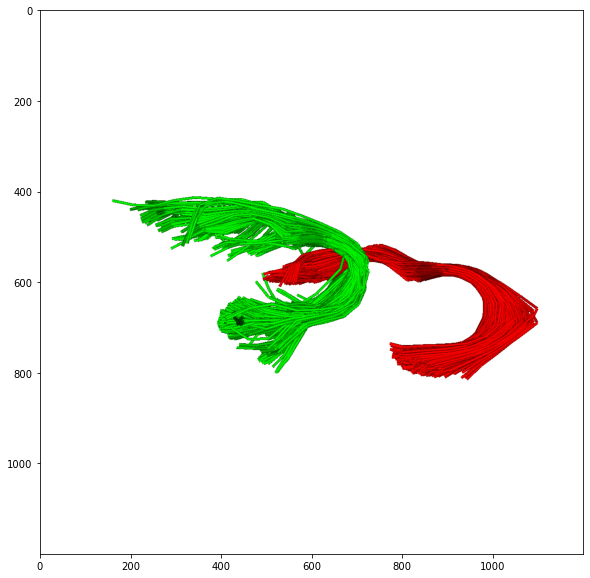

In [98]:
viz_bundles(static, moving, fname="output/static_and_moving.png")

# Let's partially deform bundle by setting $\lambda=0.5$

In [63]:
start = time()
moving_aligned, deformed_bundle, distances, match_pairs, warp_map = bundlewarp(static, moving, alpha=0.5, beta=20, max_iter=15)
end = time()

print("time taken by BundleWarp registration in seconds = ", end-start)

time taken by BundleWarp registration in seconds =  3.478480100631714


--------------------------------------------------
<font size=4 color='darkgreen'>Visualized static and moved bundle to alignment</font>

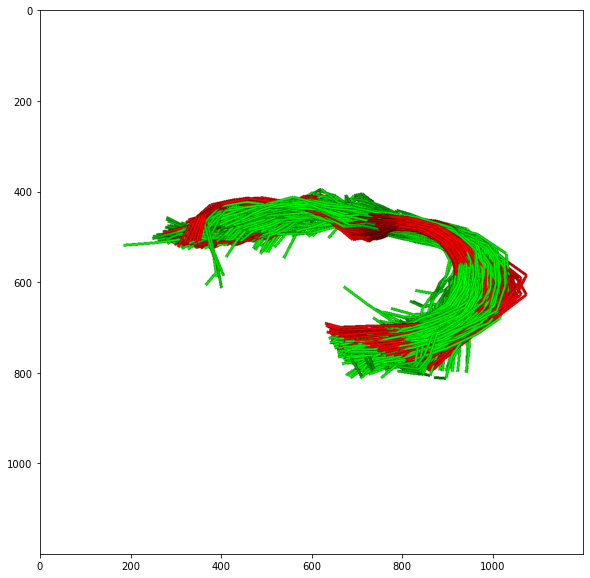

In [65]:
viz_bundles(static, deformed_bundle, fname="output/static_and_partially_deformed.png")

<font size=4 color='darkgreen'>Visualize linearly moved in blue and  nonlinearly moved in green to see BundleWarp registartion improvement over linear registration</font>

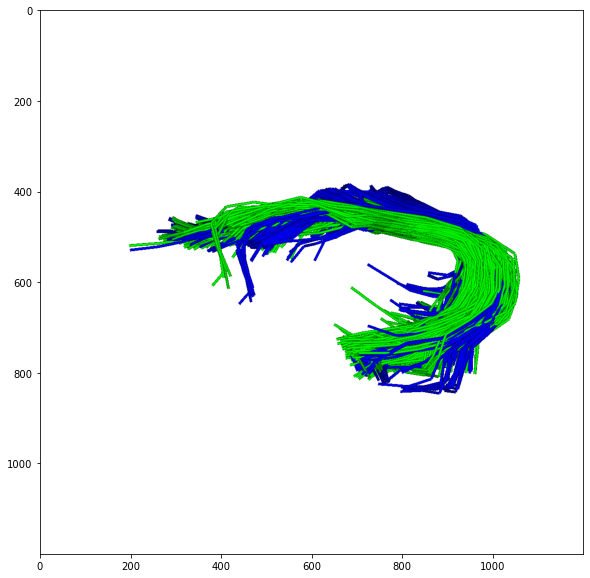

In [66]:
viz_bundles(moving_aligned, deformed_bundle, fname="output/linearly_and_nonlinearly_moved.png", c1=(0,0,1))

<font size=4 color='darkgreen'>Now, let's visualize deformation vector field generated by BundleWarp

<font size=4 color='darkgreen'>This shows us where and how much and in what directions deformations were added by BundleWarp</font>

In [67]:
offsets, directions, colors = bundlewarp_vector_filed(moving_aligned, deformed_bundle)

In [68]:
points_aligned, _ = unlist_streamlines(moving_aligned)

<font size=4 color='darkgreen'>Visualize just the vector field

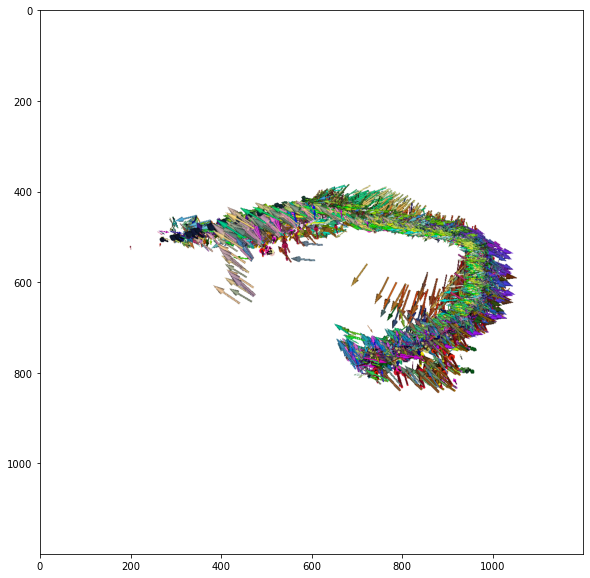

In [69]:
scene = window.Scene()
scene.SetBackground(1., 1, 1)
arrows = actor.arrow(points_aligned, directions, colors, offsets)
arrows.RotateX(-70)
arrows.RotateZ(90)
scene.add(arrows)

interactive = False
if interactive:
    window.show(scene)

fname="output/partially_vectorfield.png"
window.record(scene, n_frames=1, out_path=fname, size=(1200, 1200))
im = plt.imread(fname)
plt.figure(figsize=(10,10))
plt.imshow(im)

<font size=4 color='darkgreen'>Visualize vector field over linearly moved bundle

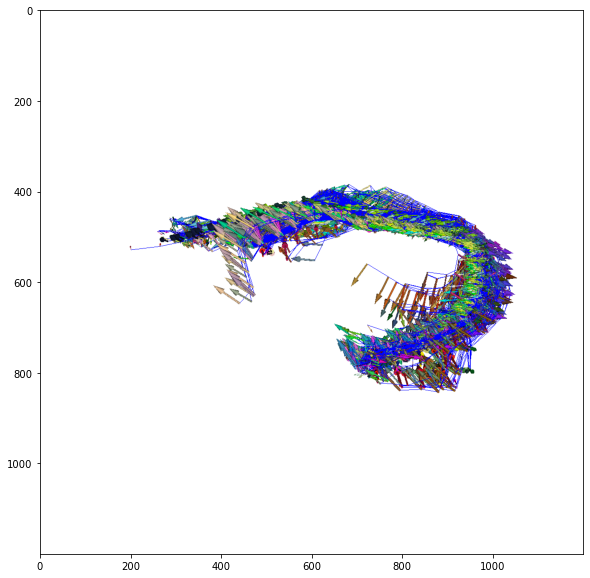

In [70]:
scene = window.Scene()
scene.SetBackground(1., 1, 1)
actor1 = actor.line(moving_aligned, colors=(0,0,1))
arrows = actor.arrow(points_aligned, directions, colors, offsets)


actor1.RotateX(-70)
actor1.RotateZ(90)

arrows.RotateX(-70)
arrows.RotateZ(90)
scene.add(arrows)
scene.add(actor1)

interactive = False
if interactive:
    window.show(scene)

fname="output/partially_vectorfield_over_linearly_moved.png"
window.record(scene, n_frames=1, out_path=fname, size=(1200, 1200))
im = plt.imread(fname)
plt.figure(figsize=(10,10))
plt.imshow(im)

<font size=4 color='darkgreen'>Visualize magnitude of deformations over linearly moved bundle

<font size=4 color='darkgreen'>It shows which streamlines were deformed the most 

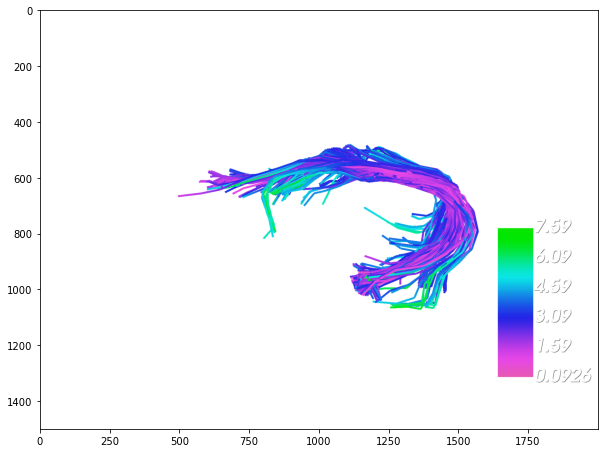

In [71]:
scene = window.Scene()
hue = (0.1, 0.9)  # blue only
hue = (0.9, 0.3)
saturation = (0.5, 1)  # black to white
scene.background((1,1,1))
lut_cmap = actor.colormap_lookup_table(
    scale_range=(offsets.min(), offsets.max()),
    hue_range=hue,
    saturation_range=saturation)

stream_actor = actor.line(moving_aligned, offsets, linewidth=7,
                           lookup_colormap=lut_cmap)

stream_actor.RotateX(-70)
stream_actor.RotateZ(90)


scene.add(stream_actor)
bar = actor.scalar_bar(lut_cmap)

scene.add(bar)



interactive = False
if interactive:
    window.show(scene)

fname="output/partially_deformation_magnitude_over_linearly_moved.png"
window.record(scene, n_frames=1, out_path=fname, size=(2000, 1500))
im = plt.imread(fname)
plt.figure(figsize=(10,10))
plt.imshow(im)

<font size=4 color='darkgreen'>We can also directly visualize magnitude of deformations over nonlinearly moved bundle (deformed bundle)



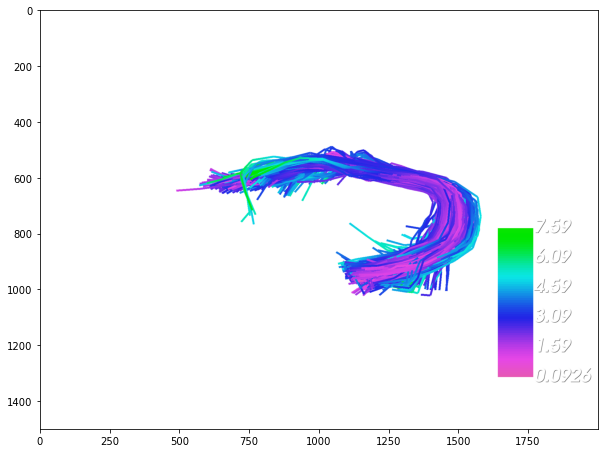

In [72]:
scene = window.Scene()
hue = (0.1, 0.9)  # blue only
hue = (0.9, 0.3)
saturation = (0.5, 1)  # black to white
scene.background((1,1,1))
lut_cmap = actor.colormap_lookup_table(
    scale_range=(offsets.min(), offsets.max()),
    hue_range=hue,
    saturation_range=saturation)

stream_actor = actor.line(deformed_bundle, offsets, linewidth=7,
                           lookup_colormap=lut_cmap)


stream_actor.RotateX(-70)
stream_actor.RotateZ(90)


scene.add(stream_actor)
bar = actor.scalar_bar(lut_cmap)

scene.add(bar)



interactive = False
if interactive:
    window.show(scene)

fname="output/partially_deformation_magnitude_over_nonlinearly_moved.png"
window.record(scene, n_frames=1, out_path=fname, size=(2000, 1500))
im = plt.imread(fname)
plt.figure(figsize=(10,10))
plt.imshow(im)

# Let's fully deform bundle by setting $\lambda<0.01$

<font size=4 color='blue'>We use MDF distances computed and returned by previous run of BundleWarp method. This will save computation.

In [73]:
start = time()
moving_aligned, deformed_bundle2, distances, match_pairs, warp_map = bundlewarp(static, moving, dist=distances, alpha=0.001, beta=20, precomputed=True)
end = time()

print("time taken by BundleWarp registration in seconds = ", end-start)

using pre-computed distances
time taken by BundleWarp registration in seconds =  1.689587116241455


--------------------------------------------------
<font size=4 color='darkgreen'>Visualized static and moved bundle to alignment

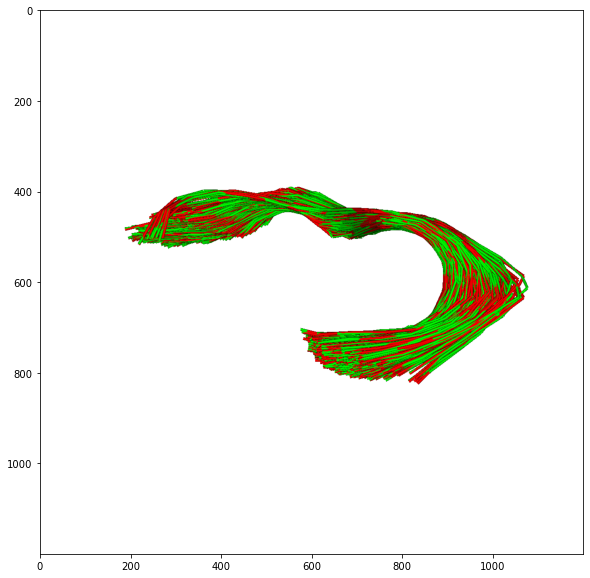

In [75]:
viz_bundles(static, deformed_bundle2, fname="output/static_and_fully_deformed.png")

<font size=4 color='darkgreen'>Now, let's visualize deformation vector field generated by BundleWarp

<font size=4 color='darkgreen'>This shows us where and how much and in what directions deformations were added by BundleWarp

In [76]:
points_aligned, _ = unlist_streamlines(moving_aligned)
offsets2, directions2, colors2 = bundlewarp_vector_filed(moving_aligned, deformed_bundle2)

<font size=4 color='darkgreen'>Visualize just the vector field

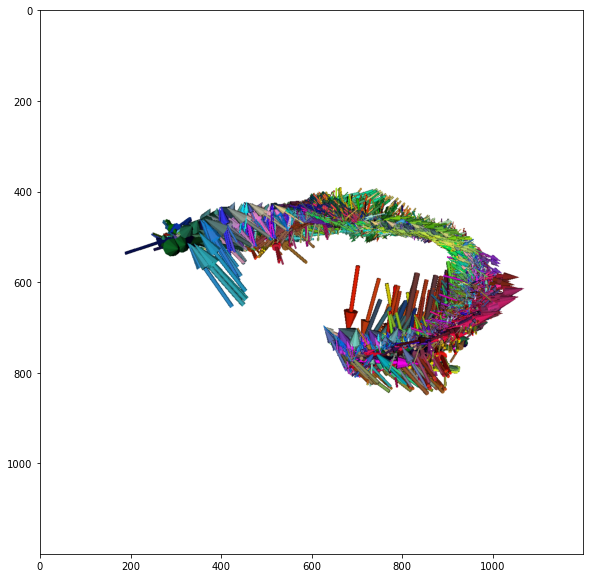

In [77]:
scene = window.Scene()
scene.SetBackground(1., 1, 1)
arrows = actor.arrow(points_aligned, directions2, colors2, offsets2)
arrows.RotateX(-70)
arrows.RotateZ(90)
scene.add(arrows)

interactive = False
if interactive:
    window.show(scene)

fname="output/fully_vectorfield.png"
window.record(scene, n_frames=1, out_path=fname, size=(1200, 1200))
im = plt.imread(fname)
plt.figure(figsize=(10,10))
plt.imshow(im)

<font size=4 color='darkgreen'>Visualize vector field over linearly moved bundle

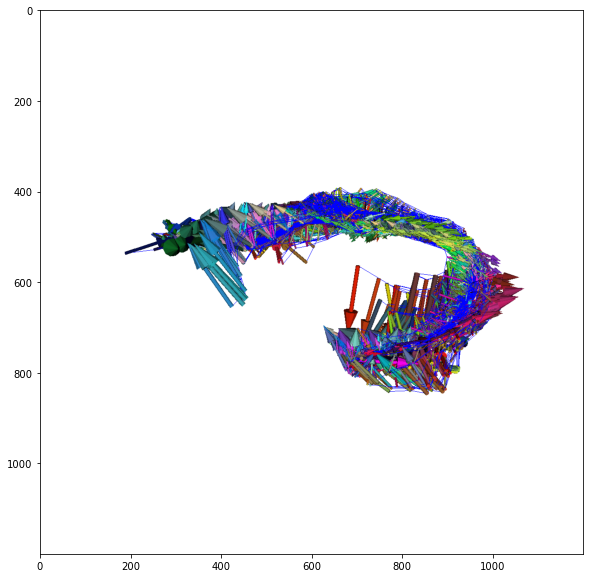

In [78]:
scene = window.Scene()
scene.SetBackground(1., 1, 1)
actor1 = actor.line(moving_aligned, colors=(0,0,1))
arrows = actor.arrow(points_aligned, directions2, colors2, offsets2)
actor1.RotateX(-70)
actor1.RotateZ(90)

arrows.RotateX(-70)
arrows.RotateZ(90)
scene.add(arrows)
scene.add(actor1)

interactive = False
if interactive:
    window.show(scene)

fname="output/fully_vectorfield_over_linearly_moved.png"
window.record(scene, n_frames=1, out_path=fname, size=(1200, 1200))
im = plt.imread(fname)
plt.figure(figsize=(10,10))
plt.imshow(im)

<font size=4 color='darkgreen'>Visualize magnitude of deformations over linearly moved bundle

<font size=4 color='darkgreen'>It shows which streamlines were deformed the most 

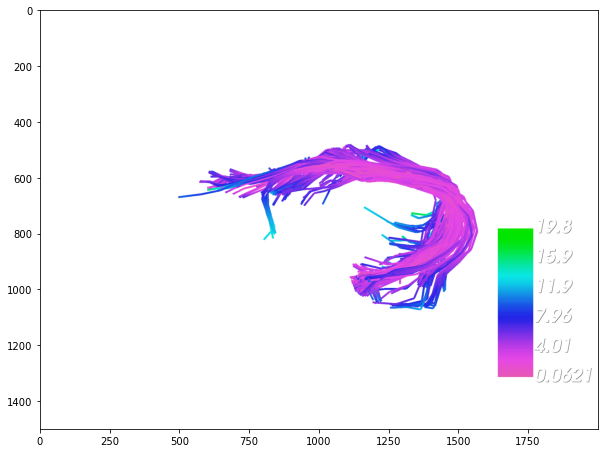

In [79]:
scene = window.Scene()
hue = (0.1, 0.9)  # blue only
hue = (0.9, 0.3)
saturation = (0.5, 1)  # black to white
scene.background((1,1,1))
lut_cmap = actor.colormap_lookup_table(
    scale_range=(offsets2.min(), offsets2.max()),
    hue_range=hue,
    saturation_range=saturation)

stream_actor = actor.line(moving_aligned, offsets2, linewidth=7,
                           lookup_colormap=lut_cmap)



stream_actor.RotateX(-70)
stream_actor.RotateZ(90)


scene.add(stream_actor)
bar = actor.scalar_bar(lut_cmap)

scene.add(bar)



interactive = False
if interactive:
    window.show(scene)

fname="output/fully_deformation_magnitude_over_linearly_moved.png"
window.record(scene, n_frames=1, out_path=fname, size=(2000, 1500))
im = plt.imread(fname)
plt.figure(figsize=(10,10))
plt.imshow(im)

<font size=4 color='darkgreen'>We can also directly visualize magnitude of deformations over nonlinearly moved bundle (deformed bundle)


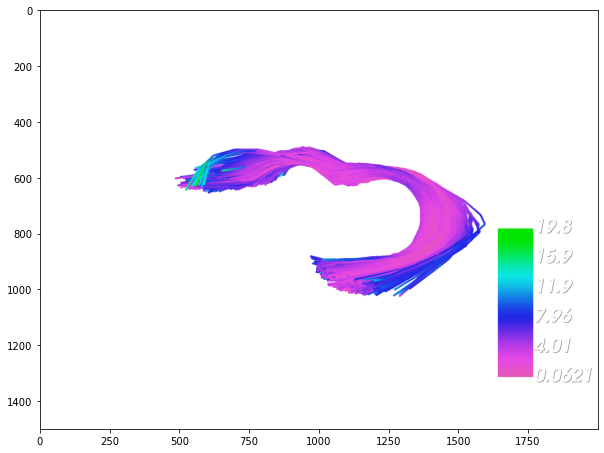

In [80]:
scene = window.Scene()
hue = (0.1, 0.9)  # blue only
hue = (0.9, 0.3)
saturation = (0.5, 1)  # black to white
scene.background((1,1,1))
lut_cmap = actor.colormap_lookup_table(
    scale_range=(offsets2.min(), offsets2.max()),
    hue_range=hue,
    saturation_range=saturation)

stream_actor = actor.line(deformed_bundle2, offsets2, linewidth=7,
                           lookup_colormap=lut_cmap)


stream_actor.RotateX(-70)
stream_actor.RotateZ(90)


scene.add(stream_actor)
bar = actor.scalar_bar(lut_cmap)

scene.add(bar)



interactive = False
if interactive:
    window.show(scene)

fname="output/fully_deformation_magnitude_over_nonlinearly_moved.png"
window.record(scene, n_frames=1, out_path=fname, size=(2000, 1500))
im = plt.imread(fname)
plt.figure(figsize=(10,10))
plt.imshow(im)

# Bundle Shape Difference Analysis with BundleWarp

<font size=4 color='blue'>Using vector field generated by fully deforming bundle we can do bundle shape difference analysis
    
We use BUAN[1] to create n segments along the length of the bundle and quantify average displacement in each segment.

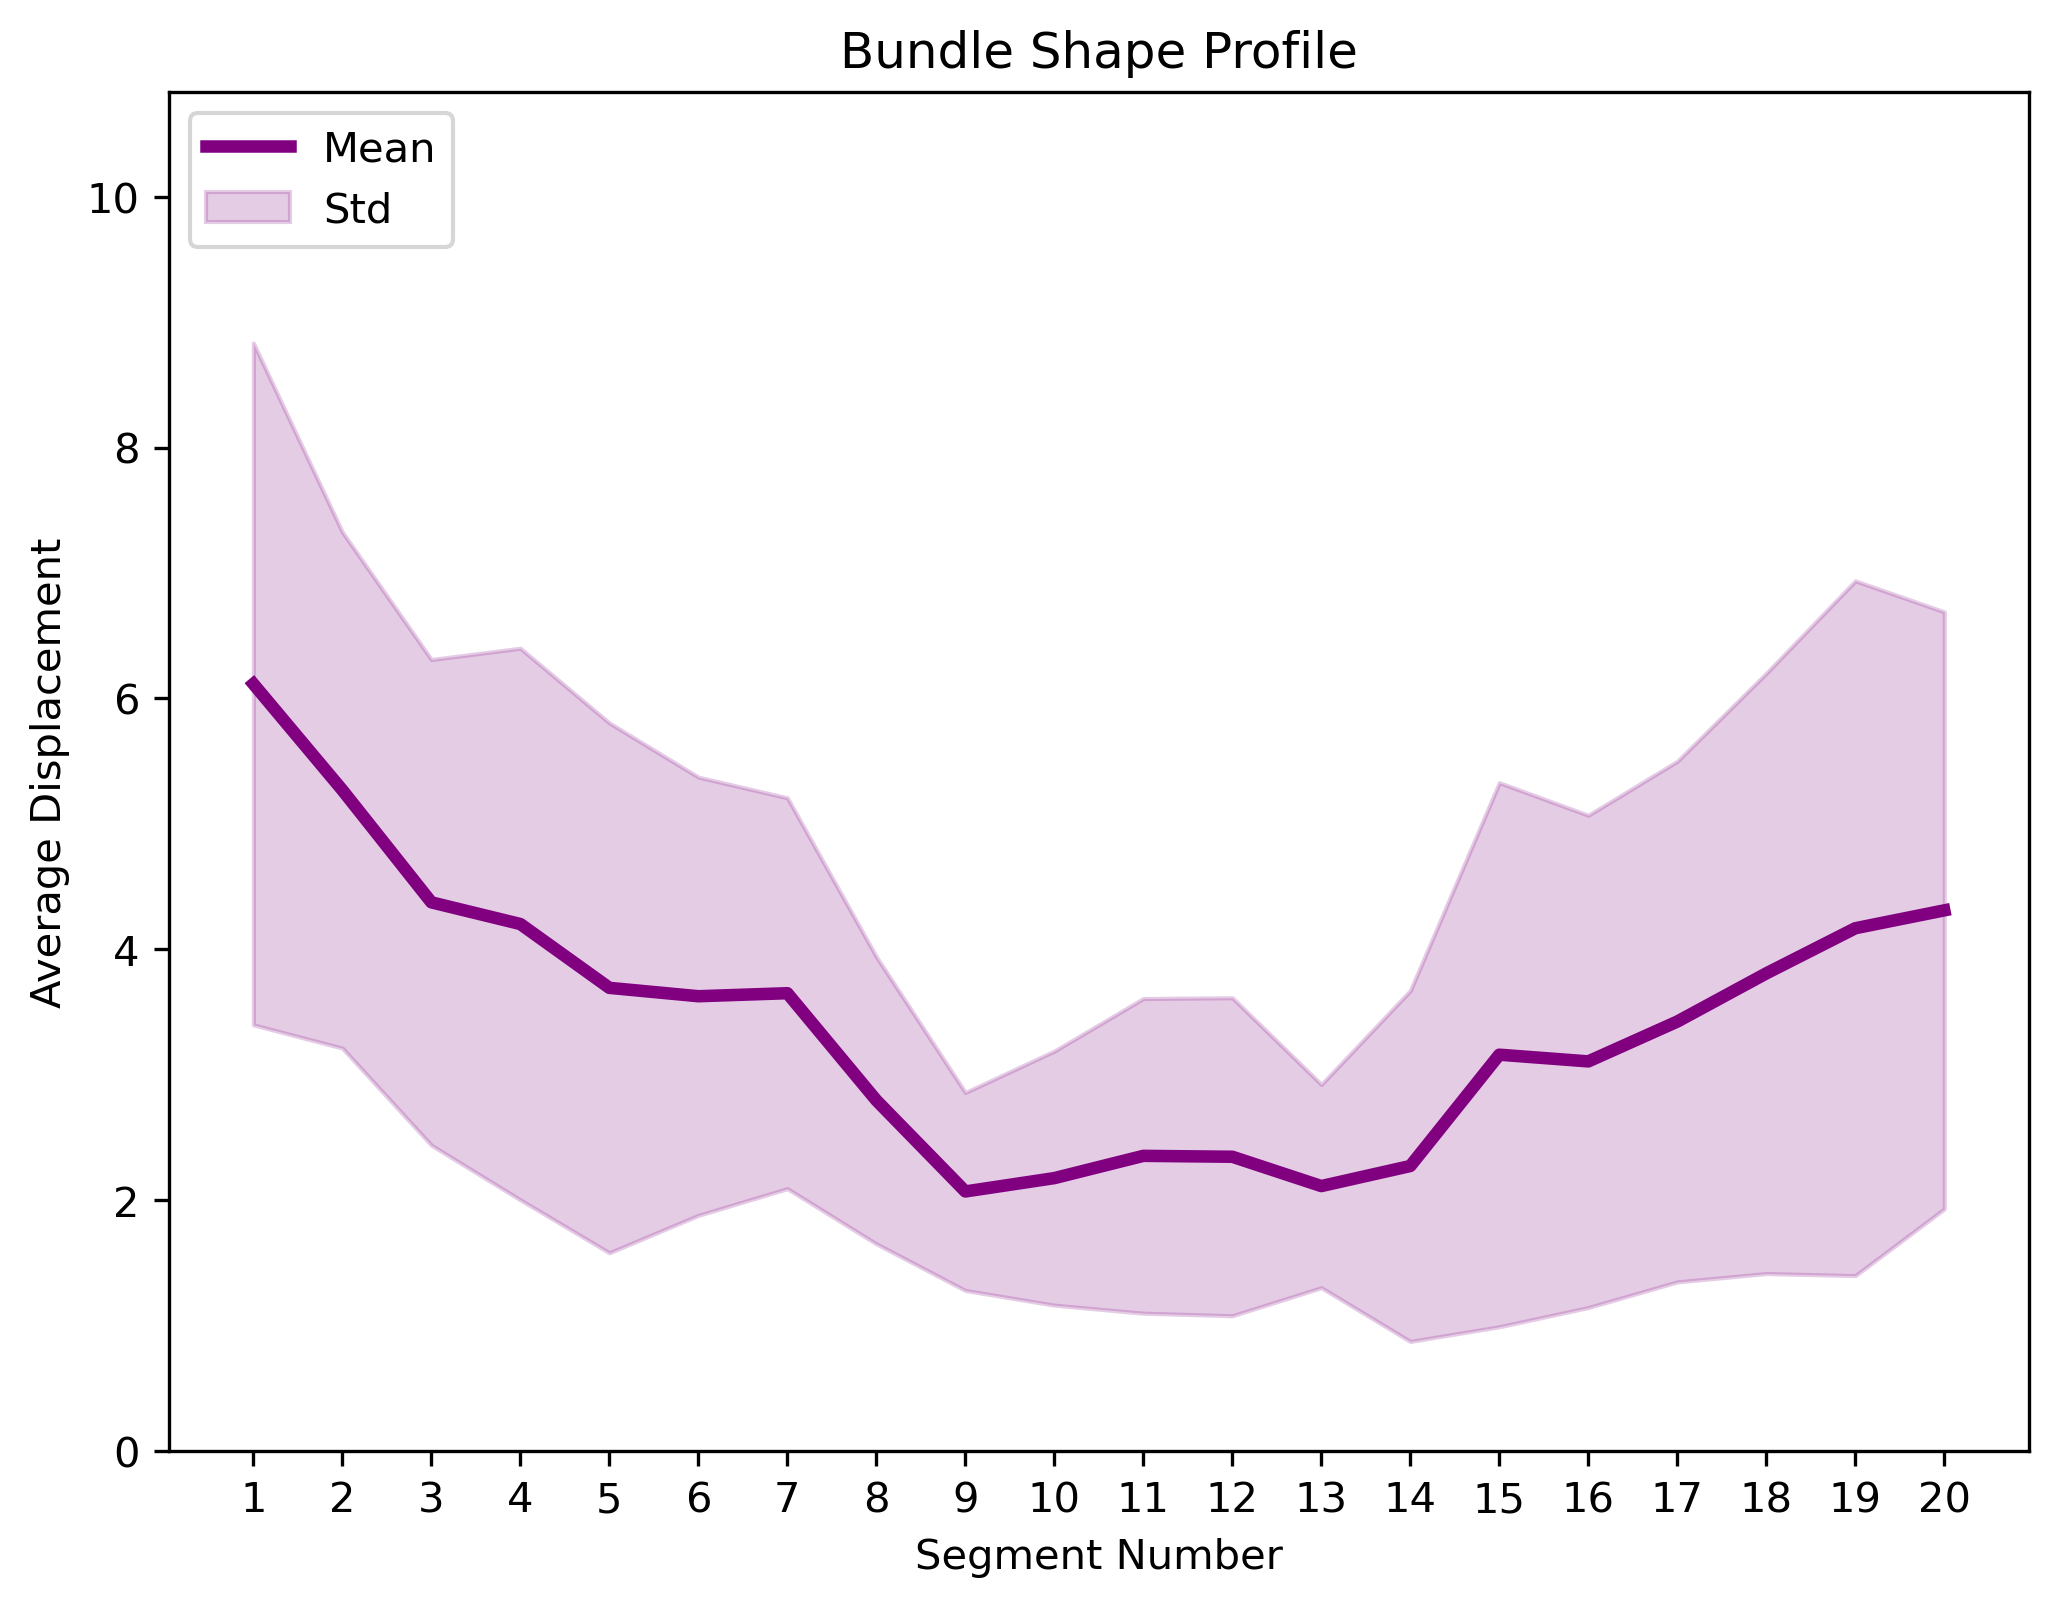

In [81]:
# using 20 number of segments
bundlewarp_shape_analysis(moving_aligned, deformed_bundle2, no_disks=20)

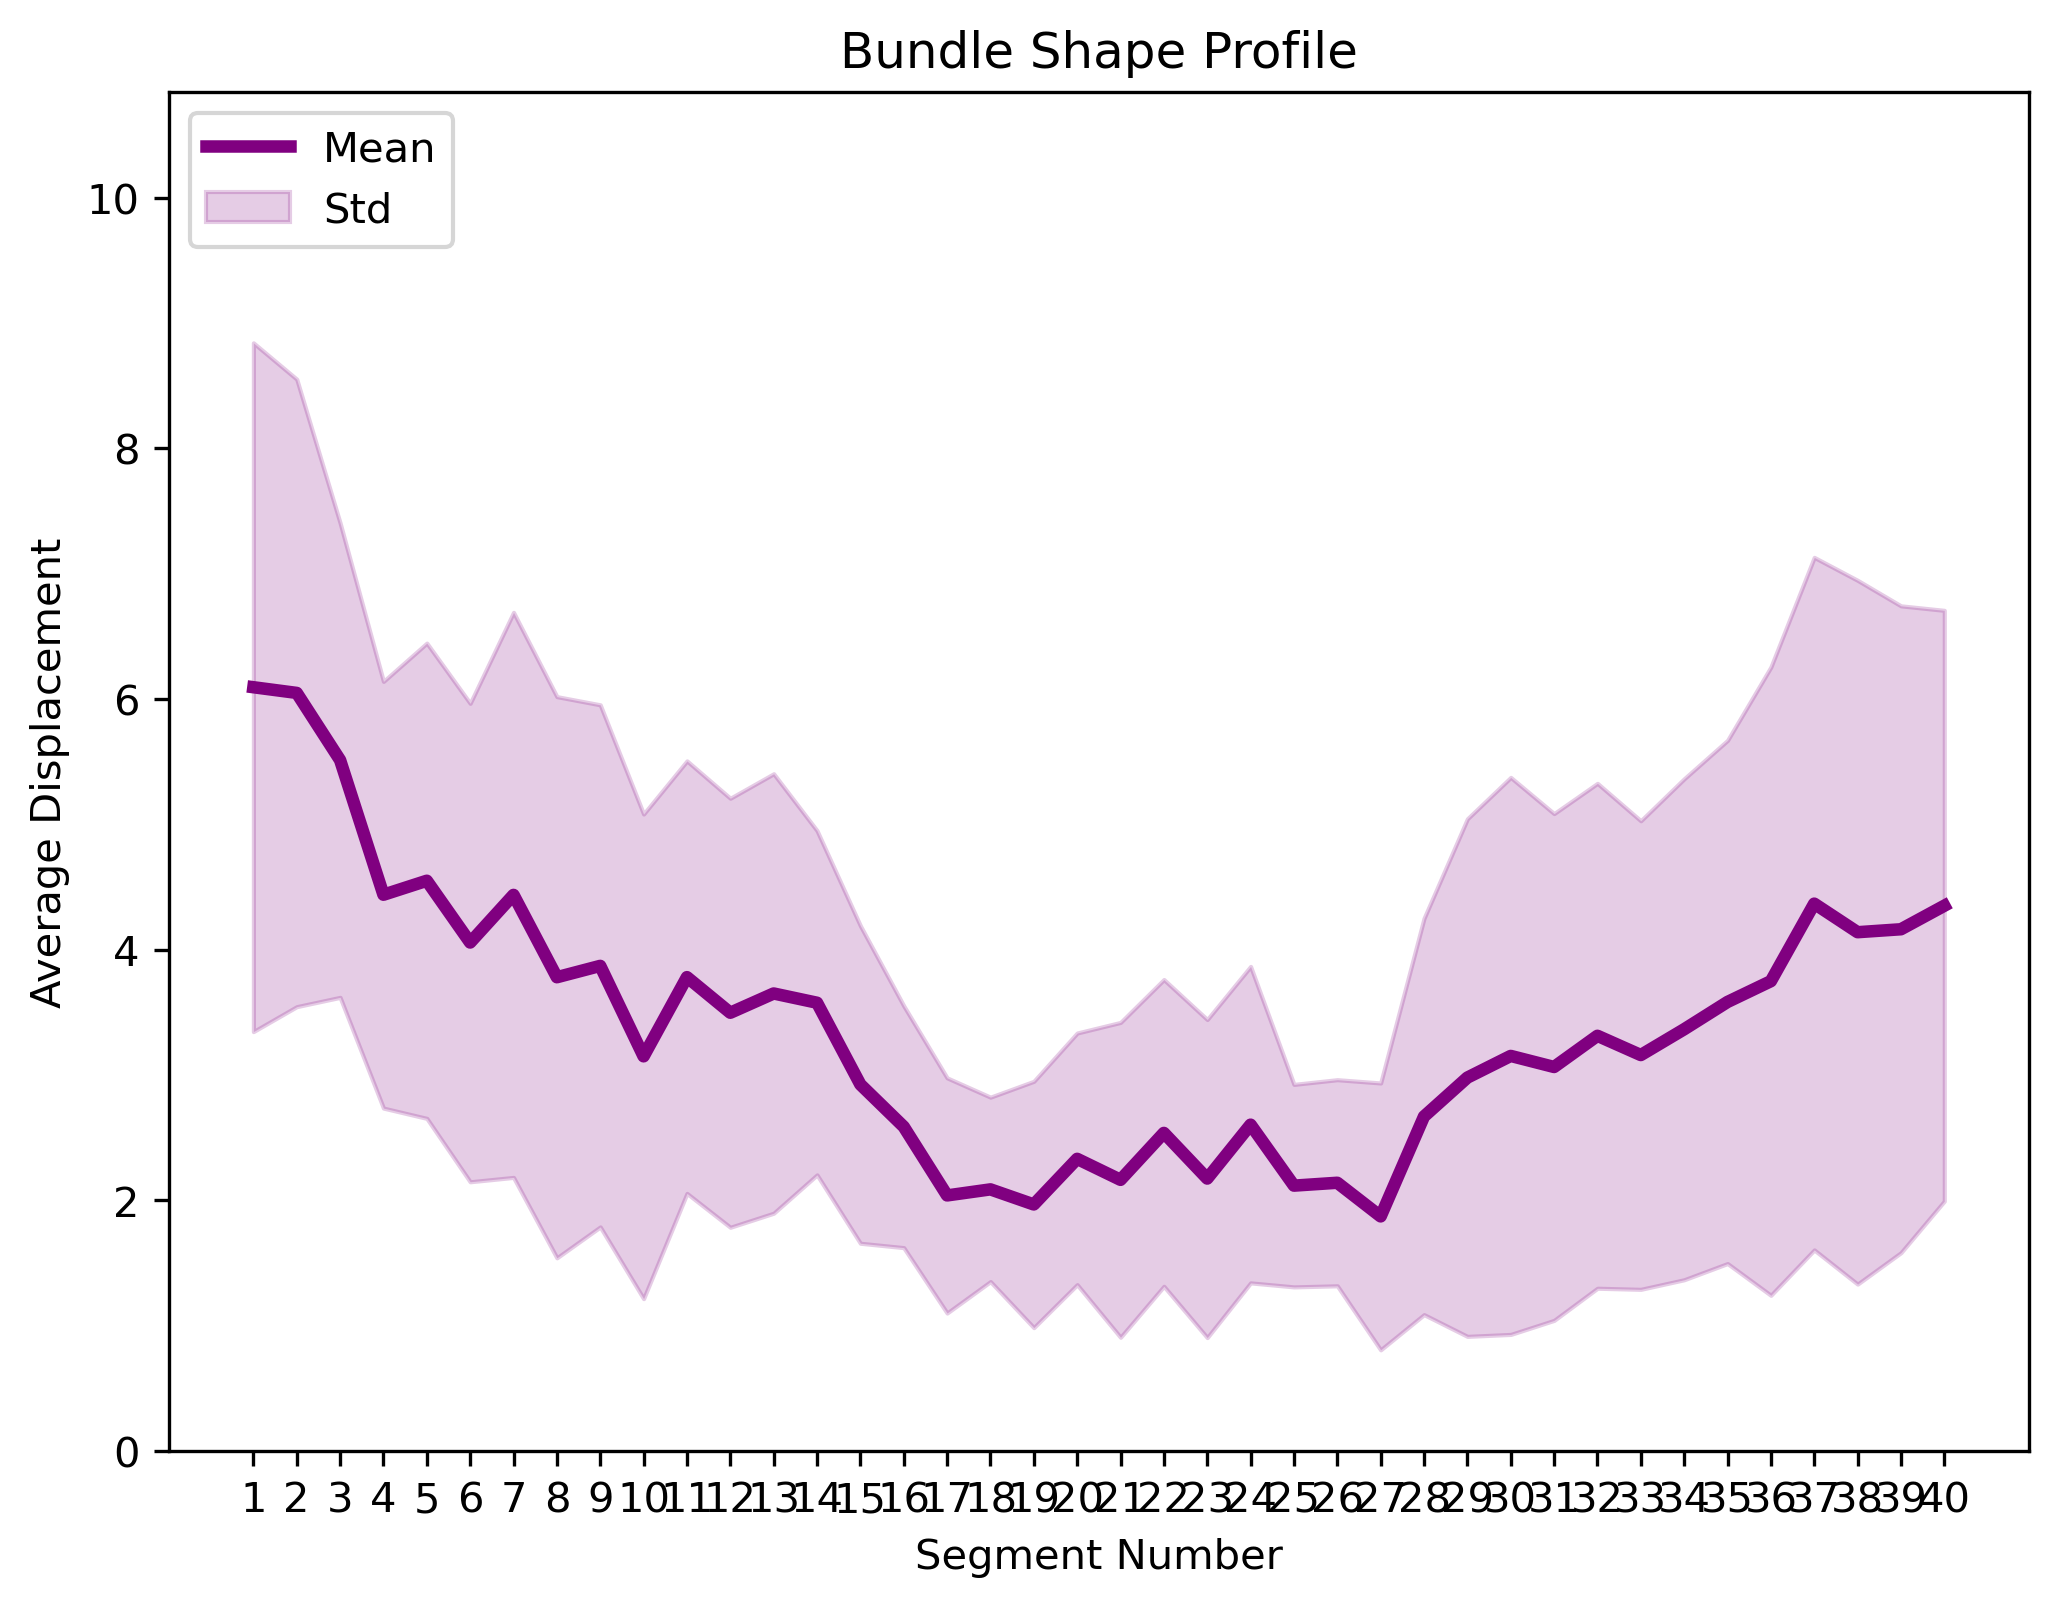

In [82]:
# using 40 number of segments
bundlewarp_shape_analysis(moving_aligned, deformed_bundle2, no_disks=40)

We can see that higher number of deformations (higher magnitude of displacement) were needed at the extremities to match two bundles. We conclude that there are higher shape differences between two bundles at the extremities.

--------

Referecnes

[1] Chandio, B.Q., Risacher, S.L., Pestilli, F., Bullock, D., Yeh, F.C., Koudoro, S., Rokem, A., Harezlak, J. and Garyfallidis, E., 2020. Bundle analytics, a computational framework for investigating the shapes and profiles of brain pathways across populations. Scientific reports, 10(1), pp.1-18.